# Example for the tropical rainfall

Build an histogram for ERA5 after having loaded data a couple of configuration files for machines and the specific diagnostic

In [5]:
import xarray as xr
import yaml
import dask

diagname = 'tropical-rainfall'
machine = 'wilma'

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

infile = config['input'][diagname]

field = xr.open_mfdataset(infile)['tp']

Slice a couple of years and select only around the Equator as in Watson et al. (2017)

In [6]:
field1 = field.sel(lat=slice(10,-10))
field2 = field1.sel(time=slice(str(namelist['year1']),str(namelist['year2'])))
field2

<xarray.DataArray 'tp' (time: 1826, lat: 81, lon: 1440)>
dask.array<getitem, shape=(1826, 81, 1440), dtype=float32, chunksize=(1826, 81, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01T11:30:00 ... 1994-12-31T11:30:00
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 10.0 9.75 9.5 9.25 9.0 ... -9.25 -9.5 -9.75 -10.0
Attributes:
    long_name:     Total precipitation
    units:         m
    code:          228
    table:         128
    cell_methods:  time: mean
    institution:   ECMWF

This can be easily improved by using dask.histogram which is much faster.

(array([2.07722558e+08, 4.17993400e+06, 6.42286000e+05, 2.33588000e+05,
        1.05567000e+05, 5.09460000e+04, 2.51200000e+04, 1.22890000e+04,
        6.19300000e+03, 3.10600000e+03, 1.49400000e+03, 8.09000000e+02,
        4.03000000e+02, 1.88000000e+02, 8.70000000e+01, 3.20000000e+01,
        1.70000000e+01, 1.20000000e+01, 8.00000000e+00, 3.00000000e+00]),
 array([0.        , 0.00105502, 0.00211004, 0.00316506, 0.00422008,
        0.0052751 , 0.00633011, 0.00738513, 0.00844015, 0.00949517,
        0.01055019, 0.01160521, 0.01266023, 0.01371525, 0.01477027,
        0.01582529, 0.01688031, 0.01793532, 0.01899034, 0.02004536,
        0.02110038], dtype=float32),
 <BarContainer object of 20 artists>)

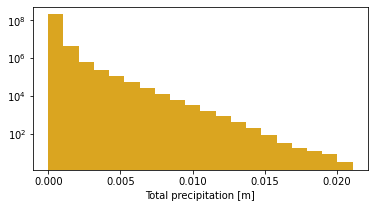

In [4]:
n_bins = 20
field2.plot.hist(bins=n_bins, yscale='log', color="goldenrod", aspect=2, size=3)
